Import modules to deal with data and load up test file.

In [1]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

datafile = "D:/fullGTV"
filenames = os.listdir(datafile)
file = os.path.join(datafile, filenames[1])
print(filenames[1])
img = nib.load(file)
img_data = img.get_data() # puts data into format plt can use
print(img_data.shape)
plt.clf()

NSCLC11_registered_OARsGTV.nii
(410, 410, 120)


Show slices of raw data as an image

0


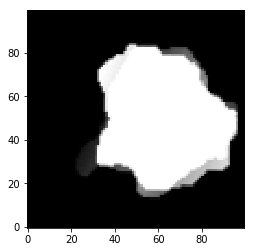

In [2]:
# function to show slices as an object
def show_slice(slice_obj):
    # Function to display row of image slices
    fig, axes = plt.subplots(1)
    axes.imshow(slice_obj, cmap="gray", origin="lower")

slice_no = 75
scan_slice = img_data[:,:,slice_no]
show_slice(img_data[150:250,150:250,slice_no]) # use 80 as default slide number for testing
print(scan_slice[30,25])
plt.show()
plt.clf()

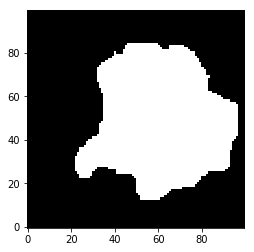

In [3]:
scan_slice[np.where(scan_slice > 0)] = 255
show_slice(img_data[150:250,150:250,slice_no])
plt.show()

Get pixels around the tumour in scan slice

True


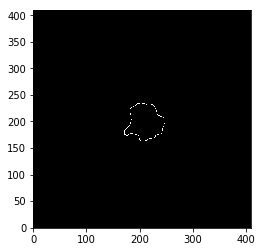

In [4]:
from skimage import feature

edges = feature.canny(scan_slice,sigma=2)
show_slice(edges) # show edges of image
print(edges.max())
plt.show()
plt.clf()

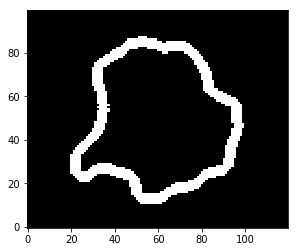

In [5]:
import skimage.filters
import skimage.morphology
mask = skimage.filters.rank.maximum(edges,skimage.morphology.disk(2))
show_slice(mask[150:250,150:270])
plt.show()
plt.clf()